In [ ]:
#!usr/bin/env python3

In [ ]:
"""
With the cleaned data from Data Import and Preprocessing, we can now visualize our data and 
utilize feature engineering so that the models we create are robust and perform optimally
"""

In [58]:
#Importing proper libraries and modules to visualize and engineer features

%store -r perovskite_set
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer

In [83]:
#Before exploring the data, I will separate the target variable (crystal score) from other features

X = perovskite_set.iloc[:,0:20]
y = perovskite_set.iloc[:,-1]

X.head()

,_rxn_M_acid,_rxn_M_inorganic,_rxn_M_organic,_stoich_mmol_org,_stoich_mmol_inorg,_stoich_mmol_acid,_stoich_mmol_solv,_stoich_org/solv,_stoich_inorg/solv,_stoich_acid/solv,_stoich_org+inorg/solv,_stoich_org+inorg+acid/solv,_stoich_org/liq,_stoich_inorg/liq,_stoich_org+inorg/liq,_stoich_org/inorg,_stoich_acid/inorg,_rxn_temperature_c,_rxn_plateEdgeQ,_raw_RelativeHumidity
0,6.823319,0.439475,0.974548,0.654897,0.295327,4.585270,5.486462,0.119366,0.053828,0.835743,0.173194,1.008937,0.065023,0.029322,0.094346,2.217530,15.526081,105,1,48.721311
1,6.665791,0.437176,0.964545,0.644316,0.292033,4.452748,5.514275,0.116845,0.052960,0.807495,0.169805,0.977299,0.064645,0.029300,0.093945,2.206309,15.247395,105,1,48.721311
2,6.725011,0.432593,0.978919,0.655876,0.289838,4.505757,5.503743,0.119169,0.052662,0.818671,0.171831,0.990502,0.065525,0.028956,0.094482,2.262907,15.545798,105,1,48.721311
3,6.813180,0.450241,0.918910,0.618426,0.303012,4.585270,5.531963,0.111791,0.054775,0.828869,0.166566,0.995435,0.061126,0.029950,0.091076,2.040930,15.132303,105,1,48.721311
4,6.485984,0.431188,0.935297,0.619166,0.285446,4.293721,5.548255,0.111597,0.051448,0.773887,0.163045,0.936931,0.062911,0.029003,0.091914,2.169118,15.042142,105,1,48.721311


In [84]:
#Our target variable dataframe just contains crystal score

y.head()

0    4
1    4
2    4
3    4
4    3
Name: _out_crystalscore, dtype: int64

array([[<AxesSubplot:title={'center':'_rxn_M_acid'}>,
        <AxesSubplot:title={'center':'_rxn_M_inorganic'}>,
        <AxesSubplot:title={'center':'_rxn_M_organic'}>],
       [<AxesSubplot:title={'center':'_stoich_mmol_org'}>,
        <AxesSubplot:title={'center':'_stoich_mmol_inorg'}>,
        <AxesSubplot:title={'center':'_stoich_mmol_acid'}>],
       [<AxesSubplot:title={'center':'_stoich_mmol_solv'}>,
        <AxesSubplot:title={'center':'_stoich_org/solv'}>,
        <AxesSubplot:title={'center':'_stoich_inorg/solv'}>],
       [<AxesSubplot:title={'center':'_stoich_acid/solv'}>,
        <AxesSubplot:title={'center':'_stoich_org+inorg/solv'}>,
        <AxesSubplot:title={'center':'_stoich_org+inorg+acid/solv'}>],
       [<AxesSubplot:title={'center':'_stoich_org/liq'}>,
        <AxesSubplot:title={'center':'_stoich_inorg/liq'}>,
        <AxesSubplot:title={'center':'_stoich_org+inorg/liq'}>],
       [<AxesSubplot:title={'center':'_stoich_org/inorg'}>,
        <AxesSubplot:title={

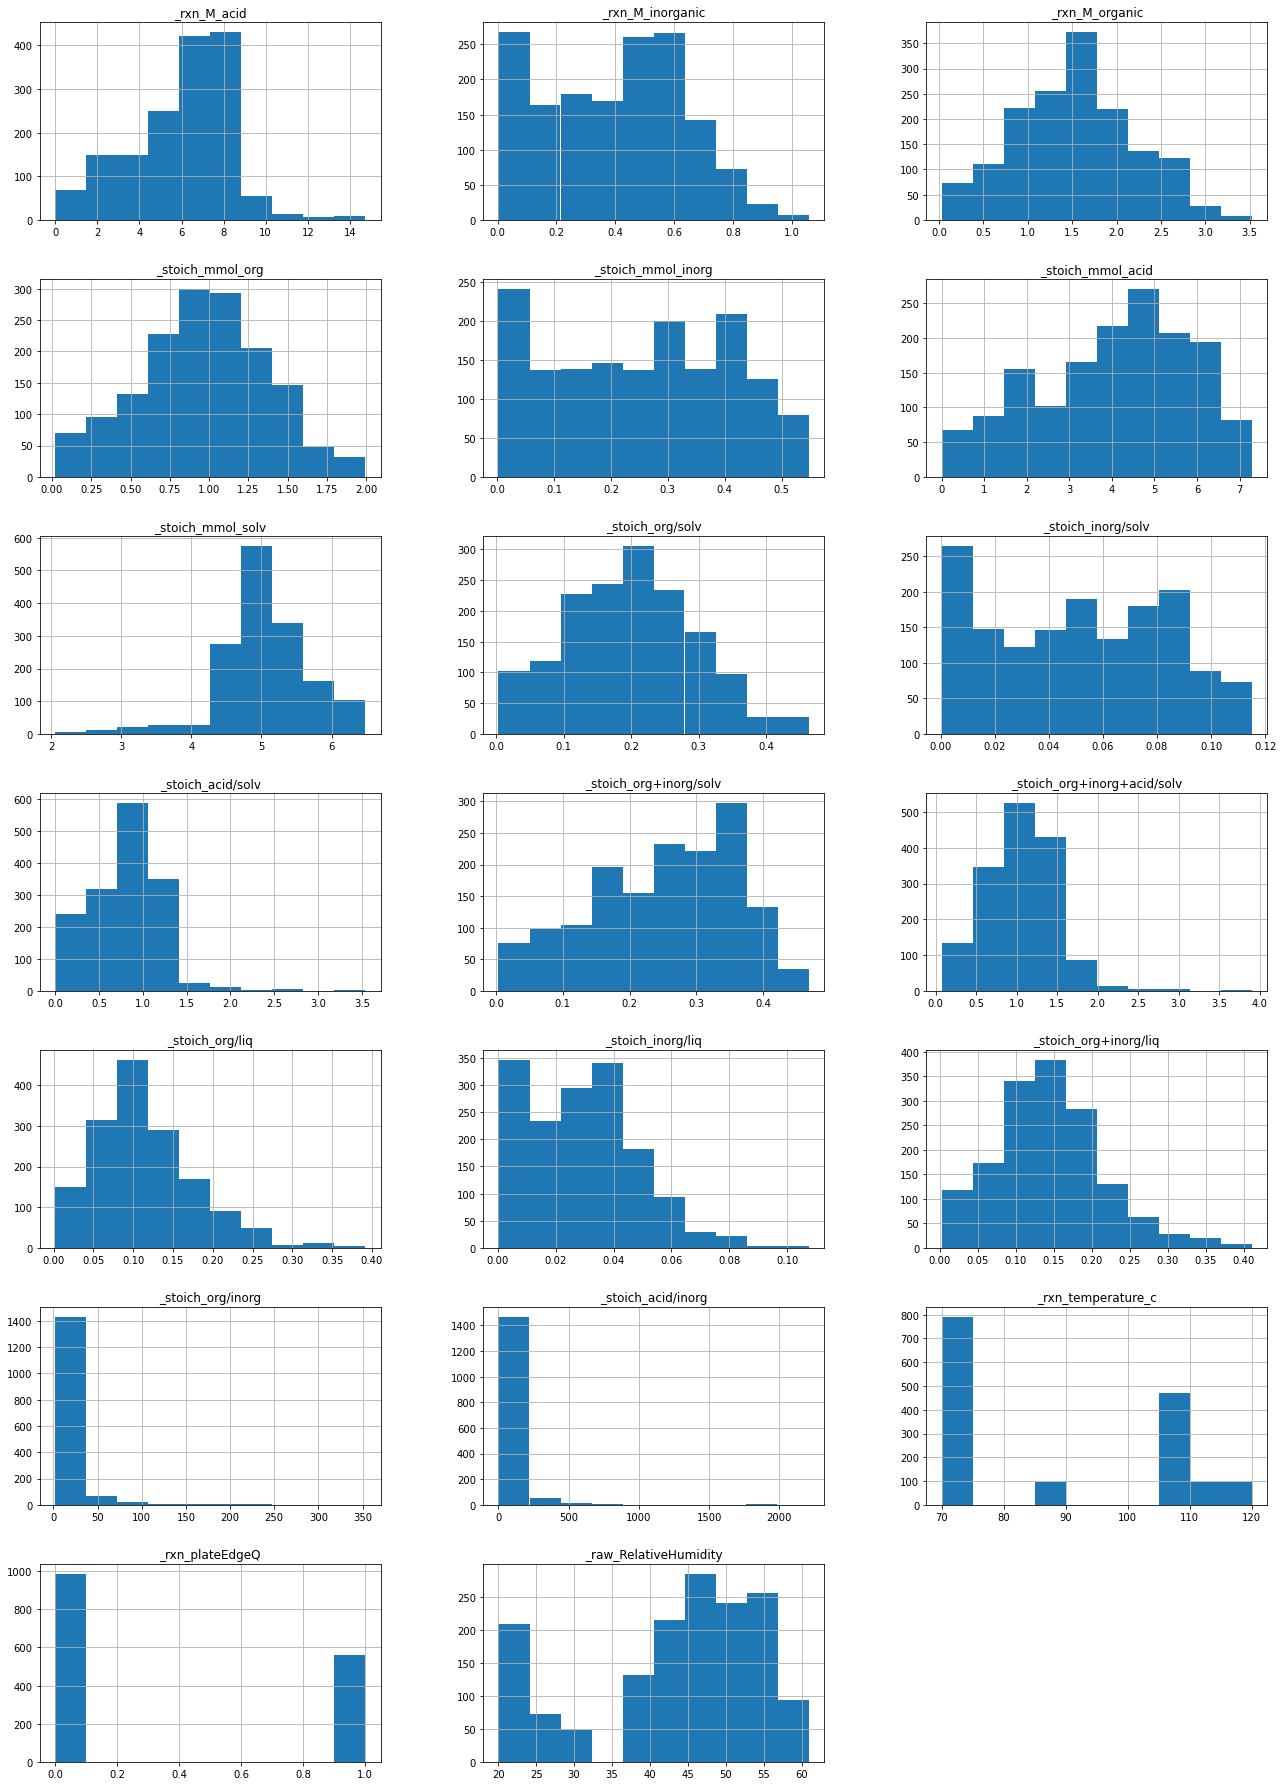

In [95]:
#Using histograms, we can check out how the values in our many feature columns are distrubuted

X.hist(layout=(7,3), figsize=(22,32))

In [ ]:
"""
All of our data will have to be normalized, but some features will also have to be 
log transformed to reduce the effect of skewed values on our models. Any feature that,
visually, seems to disobey a normal distribution will be either log transformed or square-root
transformed and all features will be normalized from 0 to 1
"""

In [127]:
#Transforming and normalizing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

no_normalize_train = X_train['_rxn_plateEdgeQ']
no_normalize_test = X_test['_rxn_plateEdgeQ']
X_train = X_train.drop('_rxn_plateEdgeQ', axis=1)
X_test = X_test.drop('_rxn_plateEdgeQ', axis=1)

to_log_trans = ['_rxn_M_acid', '_rxn_M_inorganic','_rxn_M_organic','_stoich_mmol_inorg',
               '_stoich_mmol_acid','_stoich_mmol_solv','_stoich_inorg/solv',
               '_stoich_acid/solv','_stoich_org+inorg/solv', '_rxn_temperature_c']
to_sqrt_trans = ['_stoich_inorg/liq', '_stoich_org/inorg', '_stoich_acid/inorg']

trans_log = FunctionTransformer(np.log1p)
trans_root = FunctionTransformer(np.sqrt)
    
for feature in to_sqrt_trans:
    X_train[feature] = pd.DataFrame(trans_root.fit_transform(X_train[feature]),
                                    columns=[feature])
    X_test[feature] = pd.DataFrame(trans_root.transform(X_test[feature]),
                                    columns=[feature])

for feature in to_log_trans:
    X_train[feature] = pd.DataFrame(trans_log.fit_transform(X_train[feature]),
                                    columns=[feature])
    X_test[feature] = pd.DataFrame(trans_log.transform(X_test[feature]),
                                    columns=[feature])

normalizer = Normalizer()
X_train = pd.DataFrame(normalizer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)    

X_train['_rxn_plateEdgeQ'] = no_normalize_train.to_list()
X_test['_rxn_plateEdgeQ'] = no_normalize_test.to_list()

array([[<AxesSubplot:title={'center':'_rxn_M_acid'}>,
        <AxesSubplot:title={'center':'_rxn_M_inorganic'}>,
        <AxesSubplot:title={'center':'_rxn_M_organic'}>],
       [<AxesSubplot:title={'center':'_stoich_mmol_org'}>,
        <AxesSubplot:title={'center':'_stoich_mmol_inorg'}>,
        <AxesSubplot:title={'center':'_stoich_mmol_acid'}>],
       [<AxesSubplot:title={'center':'_stoich_mmol_solv'}>,
        <AxesSubplot:title={'center':'_stoich_org/solv'}>,
        <AxesSubplot:title={'center':'_stoich_inorg/solv'}>],
       [<AxesSubplot:title={'center':'_stoich_acid/solv'}>,
        <AxesSubplot:title={'center':'_stoich_org+inorg/solv'}>,
        <AxesSubplot:title={'center':'_stoich_org+inorg+acid/solv'}>],
       [<AxesSubplot:title={'center':'_stoich_org/liq'}>,
        <AxesSubplot:title={'center':'_stoich_inorg/liq'}>,
        <AxesSubplot:title={'center':'_stoich_org+inorg/liq'}>],
       [<AxesSubplot:title={'center':'_stoich_org/inorg'}>,
        <AxesSubplot:title={

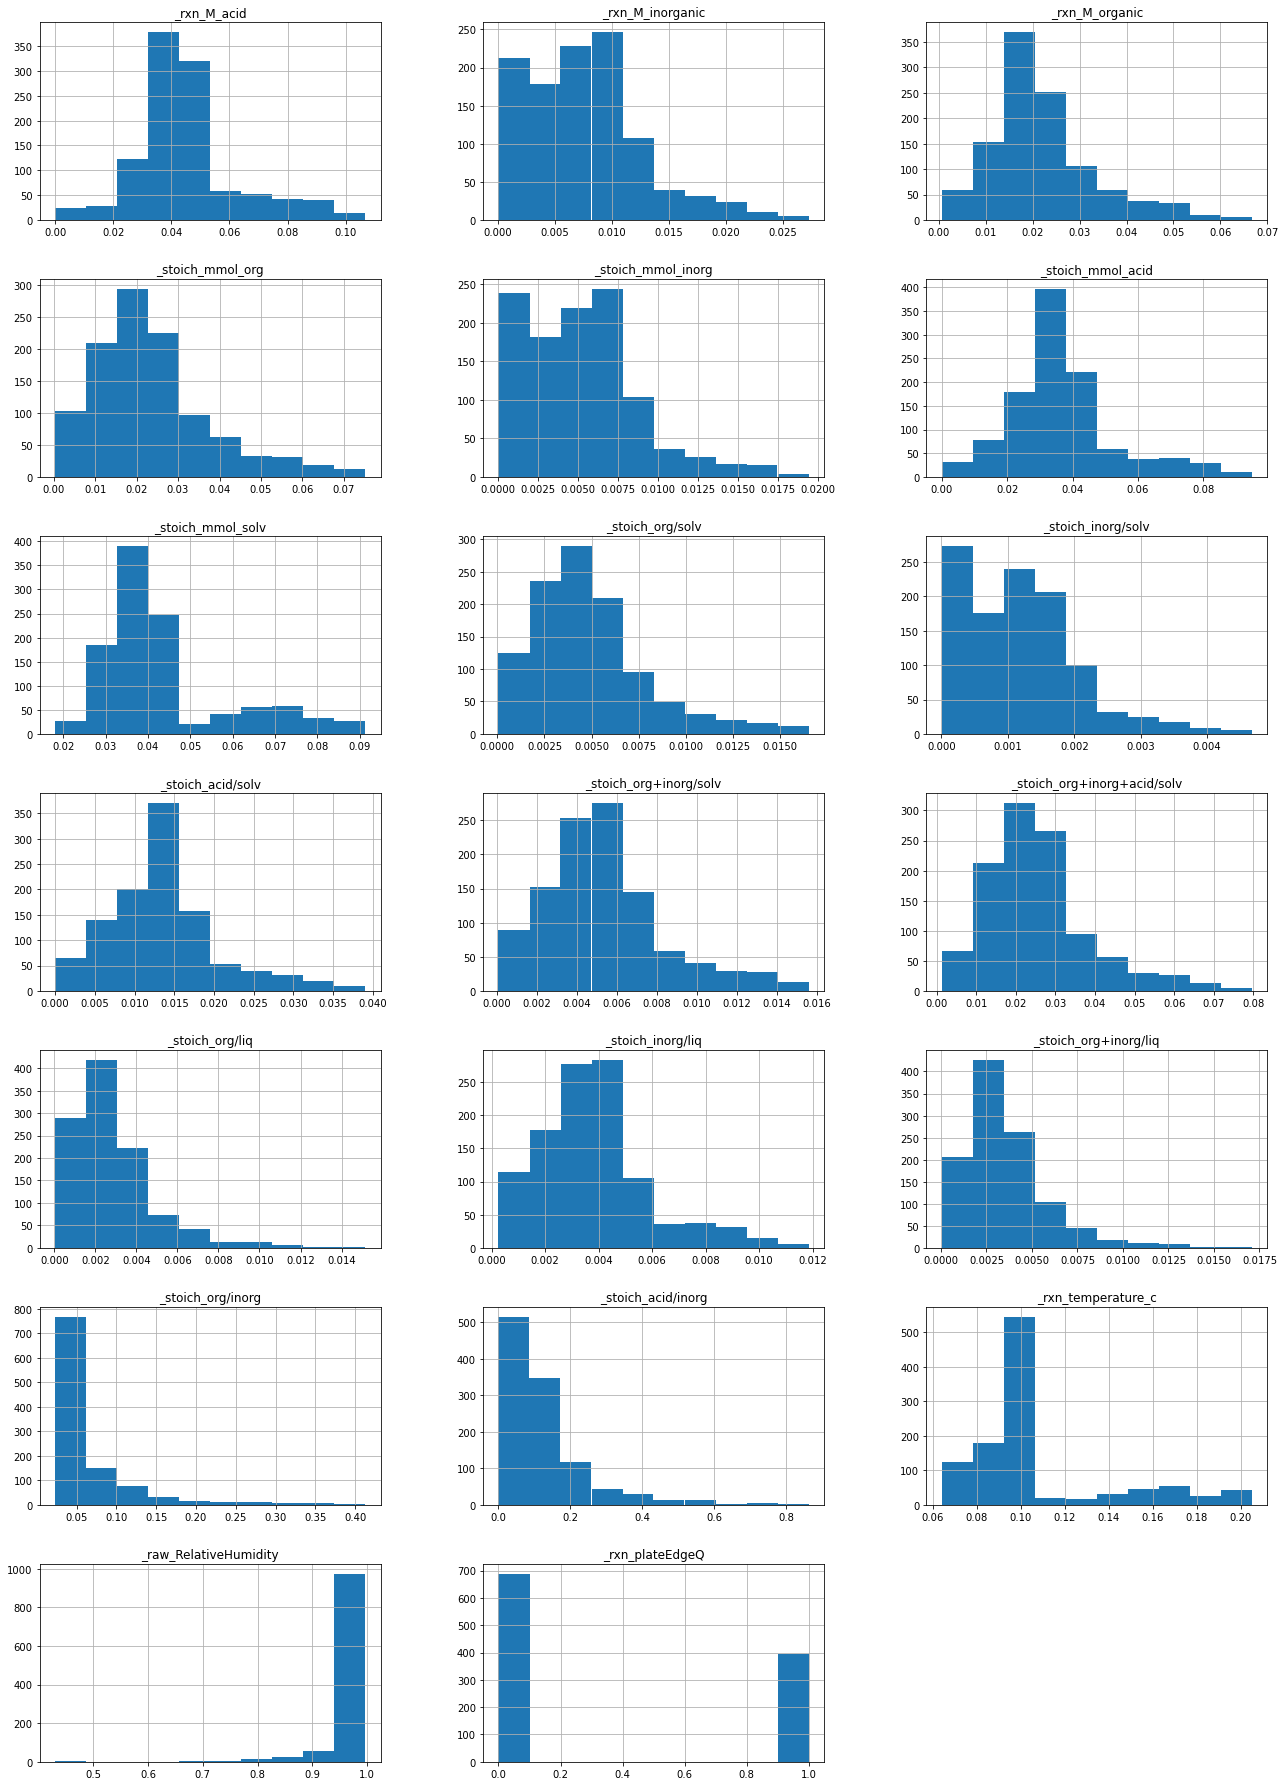

In [128]:
# Let's view this transformed data in the X_train set to see how the distributions look

X_train.hist(layout=(7,3), figsize=(22,32))

In [129]:
"""
Evidently, our data transformation has made the distribution of our features more normal
and this will ensure that our model performs optimally. We will now apply PCA to our engineered
dataset in order to see how dimensionality reduction affects our models
"""

pca = PCA(n_components=3)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

print(pca.explained_variance_ratio_)

[0.92006872 0.06517412 0.00731237]


In [132]:
"""
As indicated by the explained variance, using PCA will allow us to capture most of the
data using only three features...

Now, it is time to create, optimize, and analyze some ML models
"""

%store X_train
%store X_test
%store X_train_PCA
%store X_test_PCA
%store y_train
%store y_test

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'X_train_PCA' (ndarray)
Stored 'X_test_PCA' (ndarray)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
